# <center> Word embeddings training </center> 

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="# Importing Needed packages, download_data and preprocess">Importing Needed packages, download_data and preprocess</a></li>
        <li><a href="#Word2vec: skipgram">Word2vec: skipgram</a></li>
        <li><a href="#Word2vec: cbow">Word2vec: cbow</a></li>
        <li><a href="#fasttext">fasttext</a></li>
    </ol>
</div>
<br>
<hr>


<h2 id="Importing Needed packages, download_data and preprocess">Importing Needed packages, download_data and preprocess</h2>

In [1]:
import gensim
from gensim.models import Word2Vec
import warnings
import string
import numpy as np
import os
from random import shuffle
import re
import urllib.request
import zipfile
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
warnings.filterwarnings("ignore")

## Download and Unzipping data 

In [2]:
#download the data
urllib.request.urlretrieve("https://perso.limsi.fr/neveol/TP_ISD2020.zip", filename="TP_ISD2020.zip")
with zipfile.ZipFile("TP_ISD2020.zip", 'r') as zip_ref:
    zip_ref.extractall("TP_ISD2020")

In [3]:
data1 = open('TP_ISD2020/QUAERO_FrenchMed/QUAERO_FrenchMed_traindev.ospl', encoding="utf8")
data2 = open('TP_ISD2020/QUAERO_FrenchPress/QUAERO_FrenchPress_traindev.ospl', encoding="utf8")

In [4]:
file_str1 = data1.read()
file_str2 = data2.read()

## preprocess

In [5]:
def preprocess(str_val):
    str_val = re.sub("\r", " ", str_val)
    str_val = re.sub("\d+", " ", str_val)
    str_val = re.sub("\n", " ", str_val)
    str_val = re.sub("\uf0b7", "", str_val)

    for punc in string.punctuation:
        if punc != '.':
            str_val= str_val.replace(punc," ")
    sentences = str_val.split(".")
    
    filtered_sentences=[]
    for sentence in sentences:
        if len(sentence)>1:
            filtered_sentences.append(sentence.split())
    return filtered_sentences


In [6]:
filtered_sentences1=preprocess(file_str1)
filtered_sentences2=preprocess(file_str2)

In [7]:
filtered_sentences1

[['EMEA',
  'H',
  'C',
  'PRIALT',
  'Qu',
  '’',
  'est',
  'ce',
  'que',
  'Prialt',
  'Prialt',
  'est',
  'une',
  'solution',
  'pour',
  'perfusion',
  'contenant',
  'le',
  'principe',
  'actif',
  'ziconotide',
  'à',
  'des',
  'concentrations',
  'de',
  'ou',
  'microgrammes',
  'par',
  'millilitre'],
 ['Dans',
  'quel',
  'cas',
  'Prialt',
  'est',
  'il',
  'utilisé',
  'Prialt',
  'est',
  'indiqué',
  'pour',
  'le',
  'traitement',
  'des',
  'douleurs',
  'intenses',
  'chroniques',
  'de',
  'long',
  'terme',
  'chez',
  'les',
  'patients',
  'nécessitant',
  'une',
  'analgésie',
  'intrarachidienne',
  'injection',
  'dans',
  'l',
  '’',
  'espace',
  'qui',
  'entoure',
  'la',
  'moelle',
  'épinière',
  'et',
  'le',
  'cerveau'],
 ['Comme',
  'le',
  'nombre',
  'de',
  'patients',
  'souffrant',
  'de',
  'douleurs',
  'chroniques',
  'nécessitant',
  'une',
  'analgésie',
  'intrarachidienne',
  'analgésiques',
  'injectés',
  'directement',
  'dans',


# Word2vec

<h2 id="Word2vec: skipgram">Word2vec: skipgram</h2>

In [12]:
modelskipgram = Word2Vec(min_count=1,sg=1, size=100, window=10)
# sg=1 means skipgram, else CBOW
modelskipgram.build_vocab(filtered_sentences1) 
modelskipgram.train(filtered_sentences1, total_examples=modelskipgram.corpus_count, epochs=100)

(3245936, 4249900)

In [13]:
modelskipgram.most_similar("patient")

[('Mononucléose', 0.6014009714126587),
 ('encourus', 0.5944486856460571),
 ('repos', 0.5922062397003174),
 ('Montrez', 0.588661253452301),
 ('Paragangliome', 0.5811933279037476),
 ('stimulateur', 0.5790367722511292),
 ('gériatriques', 0.5714210271835327),
 ('rencontrés', 0.5700956583023071),
 ('certitude', 0.5620526075363159),
 ('référer', 0.5616848468780518)]

# CBOW

In [14]:
#CBOW
modelCBOW = Word2Vec(min_count=1,sg=0, workers=4, size=100, window=10) #sg=0 -> CBOW, sg here for skip-gram
modelCBOW.build_vocab(filtered_sentences1) 
modelCBOW.train(filtered_sentences1, total_examples=modelCBOW.corpus_count, epochs=100)

(3246717, 4249900)

In [15]:
modelCBOW.most_similar("douleurs")

[('chroniques', 0.7530484199523926),
 ('variait', 0.71929931640625),
 ('écoulement', 0.7121433019638062),
 ('vomissements', 0.7116720080375671),
 ('nausées', 0.704707145690918),
 ('abdominales', 0.7020184993743896),
 ('suicide', 0.6759154796600342),
 ('cérébral', 0.6704477071762085),
 ('troubles', 0.6645805239677429),
 ('sensation', 0.6618440747261047)]

8750
[ 2.194558   -1.8415357   0.912578    0.171784   -0.0278257   1.6863003
  1.5128295   0.50976574 -0.5679161  -0.3468526   1.3177483   0.4495317
  2.264417    0.39449847 -0.688885   -0.8603686  -0.45514995 -0.00966638
 -1.6803055   0.03395523 -0.09142406  0.97693455  1.6554929   0.6938338
  2.3069844  -0.20405336  1.6689088  -1.048702   -1.3304131   1.075978
 -2.582788   -2.6465757  -0.3768739   0.76250476  0.94551486  1.4620358
  0.8917457  -0.19591835  0.21053569 -0.40422732  1.1082156   1.6443442
  0.6590659  -0.21105653 -0.69773316  1.228409   -1.4937718   0.39995933
  0.21805124  0.555654    0.14367083 -0.26307672  0.67476165 -0.5805646
 -0.9238259  -1.9903387  -0.73529136  0.38260573  0.23601748  1.0771387
  0.9086407   0.51070887  1.3592774  -1.0285288  -0.8272491  -0.33930254
 -0.727371    0.01060744 -0.49257454  0.34065244  0.72337776 -1.9741892
  1.0019524   0.1764308   1.4138832   1.4367846  -0.4459723  -0.48823935
  0.00314409 -0.5580738  -0.68357456 -0.3653144   2.3168

<IPython.core.display.Javascript object>


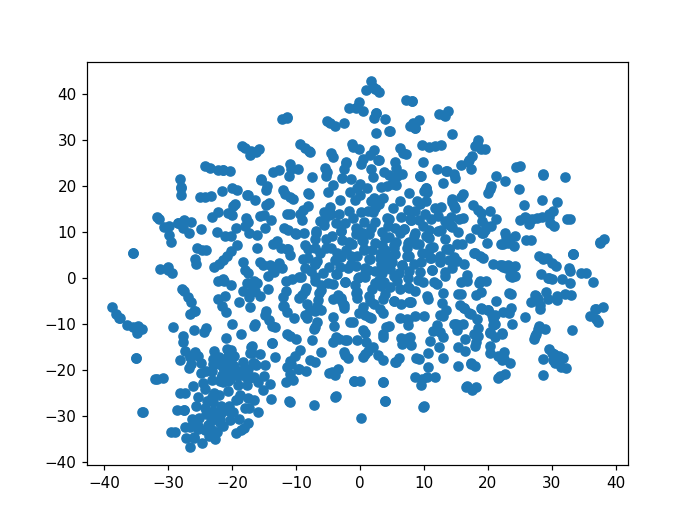

In [16]:
X = modelCBOW[modelCBOW.wv.vocab]
print(len(X))
print(X[0])
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:1000,:])
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()